In [ ]:
using Catalyst
using DifferentialEquations
using Plots
trimer = @reaction_network begin
    (k1,k2), A+B <--> AB
    (k1,k2), A+C <--> AC
    (k1,k2), B+C <--> BC
    (k3,k4), AB+C <--> ABC
    (k3,k4), AC+B <--> ABC
    (k3,k4), BC+A <--> ABC   
end
u0 = [:A => 100.0, :B => 100.0, :C => 100.0, :AB => 0.0,
 :BC => 0.0, :AC => 0.0, :ABC => 0.0] #concentration
tspan = (0., .1) #time span

#These params are for homorates
#deltaG -20

#using .reaction_network
#import reaction_networkb
trimer

Model ##ReactionSystem#241:
Unknowns (7): see unknowns(sys)
  A(t)
  B(t)
  AB(t)
  C(t)
  ⋮
Parameters (4): see parameters(sys)
  k1
  k2
  k3
  k4

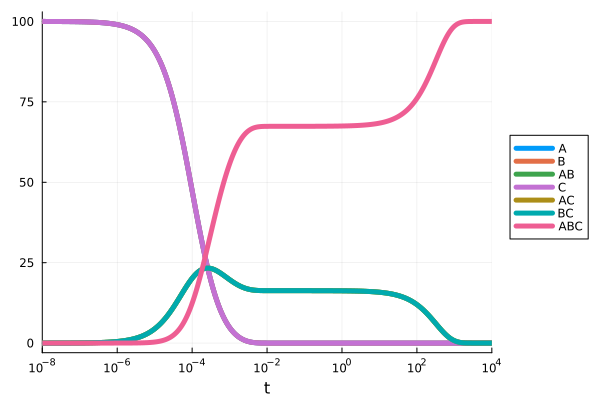

In [ ]:
#Run simulation
p = [50.0, 0.0010305768112192789, 50.0, 2.1241771276457944e-12]
params = [:k1 => p[1], :k2 => p[2], :k3 => p[3], :k4 => p[4]]
ode = ODEProblem(trimer, u0, (.00000001,10000), params)#; jac = true) #Using the jacobian
sol = solve(ode,Rodas5P())
plot(sol,xaxis=:log; lw = 5,legend=:outerright)

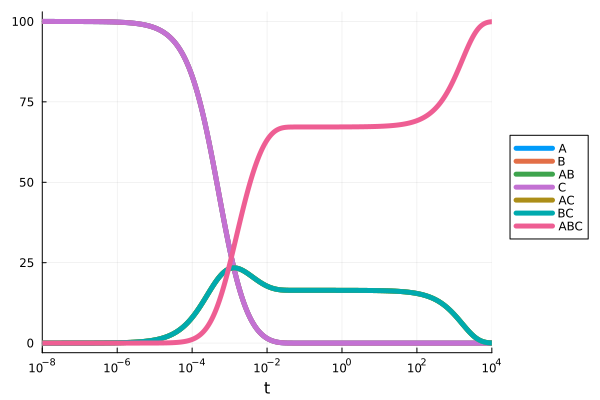

In [12]:
arr = [9.996490588731989, 0.00020604302788637893, 9.917447637368548, 4.2132830871846186e-13]
ode = ODEProblem(trimer, u0, (.00000001,10000), [:k1=>arr[1], :k2=>arr[2], :k3=>arr[3], :k4=>arr[4]])#; jac = true) #Using the jacobian
sol = solve(ode,Rodas5P())
plot(sol,xaxis=:log; lw = 5,legend=:outerright)

In [1]:
trimer

UndefVarError: UndefVarError: `trimer` not defined

In [ ]:
println(sol.u)

In [3]:
using Flux
forward_rates = [50.0,50.0]
lr = .01
sum(relu.((10*lr).-forward_rates)) + sum(relu.(forward_rates.-10)) 

80.0

In [ ]:
#print(rn)
include("./optim.jl")